# DATA LOADING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:

train_images = []
train_labels = []

# carico tutti i training batch
for i in range(1, 6):
    batch = unpickle(f'/Users/kingsleygranita/Documents/SCUOLA/DEEP LEARNING/PROGETTO/cifar-10-batches-py/data_batch_{i}')
    train_images.append(batch[b'data'])
    train_labels += batch[b'labels']

# Converto in array numpy e rimodellare le immagini
import numpy as np
train_images = np.concatenate(train_images)

In [4]:
train_images.shape

(50000, 3072)

In [5]:
train_images = train_images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
train_labels = np.array(train_labels)

print(f"Shape delle immagini di addestramento: {train_images.shape}")
print(f"Shape delle etichette di addestramento: {train_labels.shape}")

Shape delle immagini di addestramento: (50000, 32, 32, 3)
Shape delle etichette di addestramento: (50000,)


In [6]:
# Carico il batch di test
test_batch = unpickle('/Users/kingsleygranita/Documents/SCUOLA/DEEP LEARNING/PROGETTO/cifar-10-batches-py/test_batch')

# Estrazione delle immagini e delle etichette di test
test_images = test_batch[b'data']
test_labels = np.array(test_batch[b'labels'])

# Rimodellare le immagini di test
test_images = test_images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

print(f"Shape delle immagini di test: {test_images.shape}")
print(f"Shape delle etichette di test: {test_labels.shape}")

Shape delle immagini di test: (10000, 32, 32, 3)
Shape delle etichette di test: (10000,)


In [7]:
train_labels

array([6, 9, 9, ..., 9, 1, 1])

In [8]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# INPUT NORMALIZATION

## Training set normalization

In [9]:
train_images = np.array(train_images)

In [10]:
print(f"Valore minimo dei pixel: {train_images.min()}")
print(f"Valore massimo dei pixel: {train_images.max()}")

Valore minimo dei pixel: 0
Valore massimo dei pixel: 255


In [11]:
train_images = train_images.astype('float32') / 255.0

In [12]:
print(f"Valore minimo dei pixel: {train_images.min()}")
print(f"Valore massimo dei pixel: {train_images.max()}")

Valore minimo dei pixel: 0.0
Valore massimo dei pixel: 1.0


In [13]:
print(f"Shape delle immagini di addestramento: {train_images.shape}")

Shape delle immagini di addestramento: (50000, 32, 32, 3)


## Test set normalization

In [14]:
test_images = test_images.astype('float32') / 255.0

In [15]:
print(f"Valore minimo dei pixel: {test_images.min()}")
print(f"Valore massimo dei pixel: {test_images.max()}")

Valore minimo dei pixel: 0.0
Valore massimo dei pixel: 1.0


# CREATION OF VALIDATION SET

In [16]:
from sklearn.model_selection import train_test_split

train_images, val_data, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.15, random_state=42
)

In [17]:
val_labels.shape

(7500,)

In [18]:
len(train_labels)

42500

In [19]:
train_labels

array([0, 8, 6, ..., 8, 8, 8])

In [20]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
labels_mapped2 = [class_names[label] for label in train_labels]
labels_mapped2

['Airplane',
 'Ship',
 'Frog',
 'Deer',
 'Bird',
 'Dog',
 'Deer',
 'Automobile',
 'Automobile',
 'Dog',
 'Bird',
 'Ship',
 'Airplane',
 'Truck',
 'Truck',
 'Automobile',
 'Horse',
 'Dog',
 'Airplane',
 'Bird',
 'Frog',
 'Frog',
 'Cat',
 'Airplane',
 'Dog',
 'Cat',
 'Frog',
 'Truck',
 'Truck',
 'Truck',
 'Ship',
 'Horse',
 'Bird',
 'Bird',
 'Truck',
 'Truck',
 'Dog',
 'Automobile',
 'Airplane',
 'Bird',
 'Bird',
 'Dog',
 'Frog',
 'Truck',
 'Frog',
 'Ship',
 'Truck',
 'Dog',
 'Frog',
 'Truck',
 'Bird',
 'Dog',
 'Bird',
 'Truck',
 'Automobile',
 'Truck',
 'Cat',
 'Cat',
 'Deer',
 'Truck',
 'Dog',
 'Cat',
 'Frog',
 'Automobile',
 'Cat',
 'Dog',
 'Automobile',
 'Bird',
 'Frog',
 'Deer',
 'Frog',
 'Horse',
 'Automobile',
 'Bird',
 'Deer',
 'Ship',
 'Ship',
 'Bird',
 'Ship',
 'Airplane',
 'Bird',
 'Frog',
 'Frog',
 'Frog',
 'Cat',
 'Bird',
 'Automobile',
 'Dog',
 'Truck',
 'Frog',
 'Bird',
 'Horse',
 'Bird',
 'Automobile',
 'Horse',
 'Horse',
 'Frog',
 'Frog',
 'Frog',
 'Dog',
 'Airplane',
 '

In [21]:
for num, label in zip(train_labels, labels_mapped2):
    print(f'Numero: {num} -> Etichetta: {label}')

Numero: 0 -> Etichetta: Airplane
Numero: 8 -> Etichetta: Ship
Numero: 6 -> Etichetta: Frog
Numero: 4 -> Etichetta: Deer
Numero: 2 -> Etichetta: Bird
Numero: 5 -> Etichetta: Dog
Numero: 4 -> Etichetta: Deer
Numero: 1 -> Etichetta: Automobile
Numero: 1 -> Etichetta: Automobile
Numero: 5 -> Etichetta: Dog
Numero: 2 -> Etichetta: Bird
Numero: 8 -> Etichetta: Ship
Numero: 0 -> Etichetta: Airplane
Numero: 9 -> Etichetta: Truck
Numero: 9 -> Etichetta: Truck
Numero: 1 -> Etichetta: Automobile
Numero: 7 -> Etichetta: Horse
Numero: 5 -> Etichetta: Dog
Numero: 0 -> Etichetta: Airplane
Numero: 2 -> Etichetta: Bird
Numero: 6 -> Etichetta: Frog
Numero: 6 -> Etichetta: Frog
Numero: 3 -> Etichetta: Cat
Numero: 0 -> Etichetta: Airplane
Numero: 5 -> Etichetta: Dog
Numero: 3 -> Etichetta: Cat
Numero: 6 -> Etichetta: Frog
Numero: 9 -> Etichetta: Truck
Numero: 9 -> Etichetta: Truck
Numero: 9 -> Etichetta: Truck
Numero: 8 -> Etichetta: Ship
Numero: 7 -> Etichetta: Horse
Numero: 2 -> Etichetta: Bird
Numero: 

In [22]:
classes, counts = np.unique(labels_mapped2, return_counts=True)
counts

array([4279, 4266, 4231, 4232, 4296, 4237, 4251, 4245, 4229, 4234])

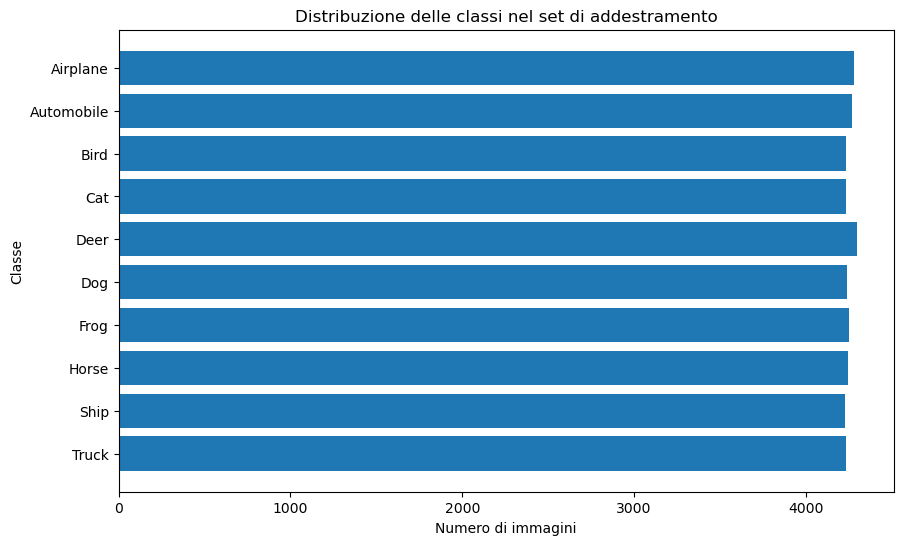

In [23]:
# Definire le nuove classi
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Creare il grafico a barre orizzontale
plt.figure(figsize=(10, 6))
plt.barh(classes_name, counts)
plt.title('Distribuzione delle classi nel set di addestramento')
plt.xlabel('Numero di immagini')
plt.ylabel('Classe')
plt.gca().invert_yaxis()  # Invertire l'asse y per avere la classe con conteggi maggiori in alto
plt.show()

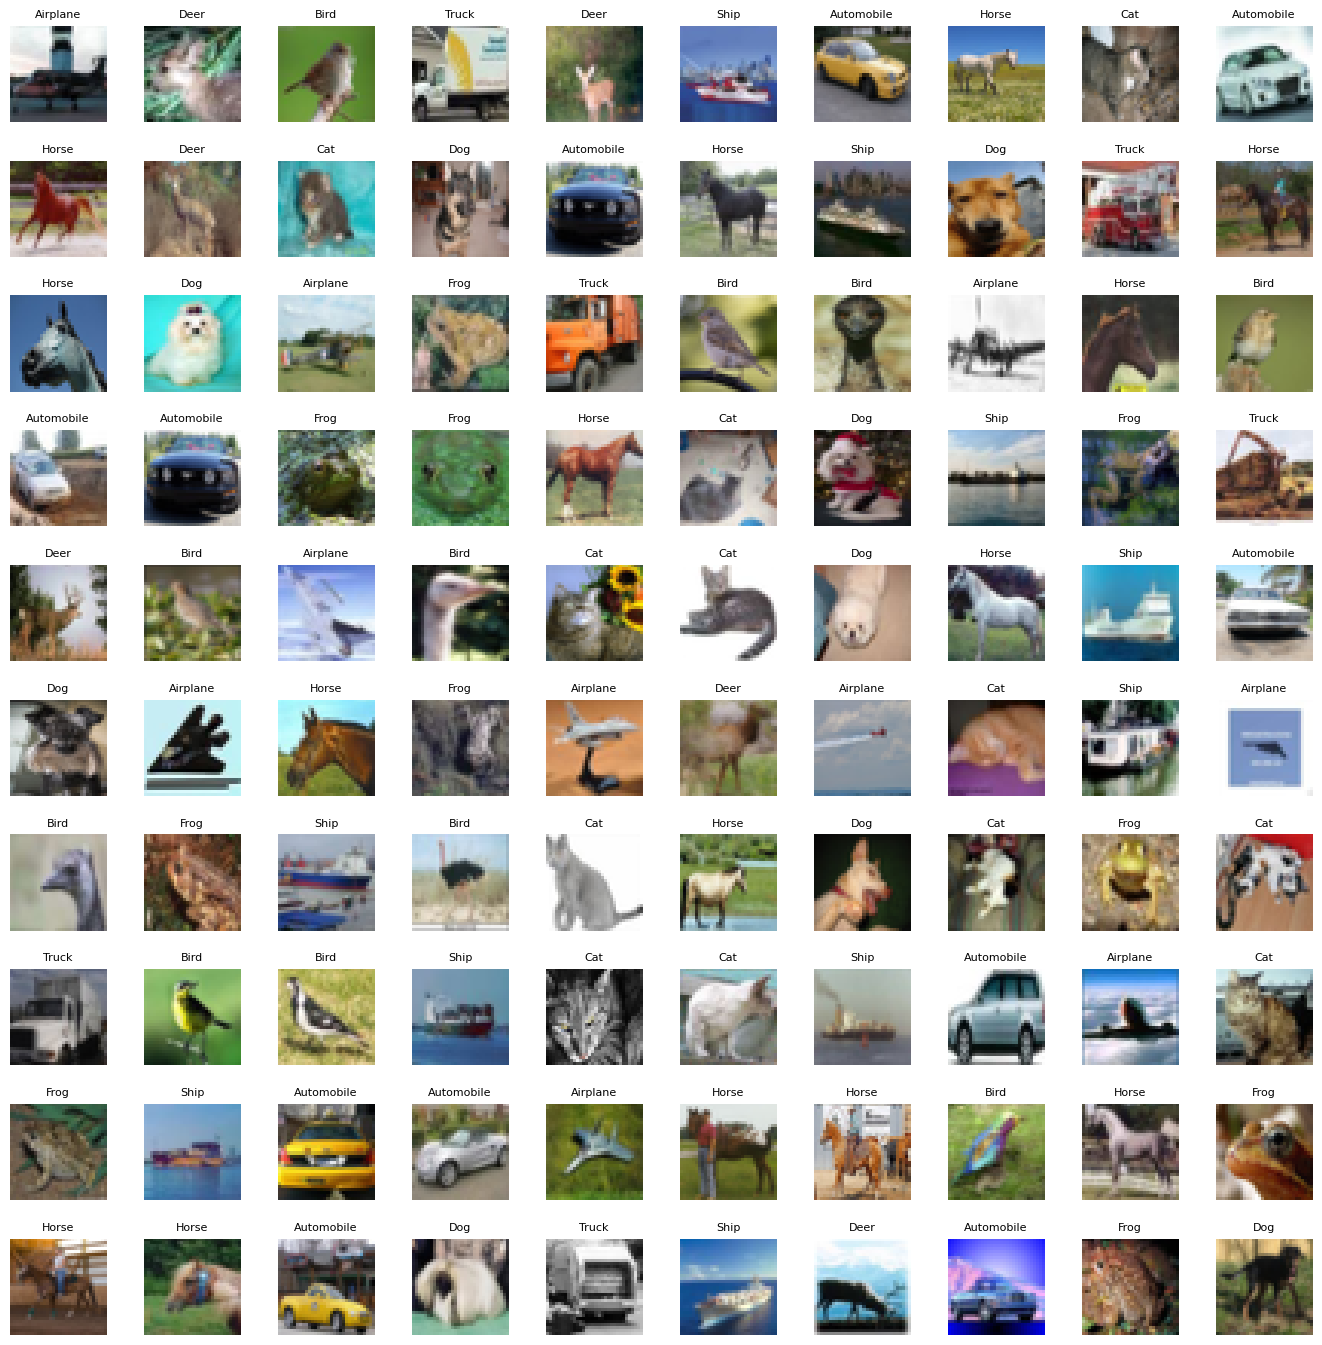

In [24]:
# Definire le dimensioni della griglia
W_grid = 10
L_grid = 10

# Creare una figura e assi
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))
axes = axes.ravel()  # Appiattire la matrice 10x10 in un array di 100 elementi

n_train = len(train_images)  # Ottenere la lunghezza del dataset di addestramento

# Selezionare e visualizzare le immagini
for i in np.arange(0, W_grid * L_grid):  # Creare variabili spaziate uniformemente
    index = np.random.randint(0, n_train)  # Selezionare un numero casuale
    axes[i].imshow(train_images[index])  # Leggere e visualizzare un'immagine con l'indice selezionato
    axes[i].set_title(labels_mapped2[index], fontsize=8)  # Impostare il titolo usando labels_mapped2
    axes[i].axis('off')  # Nascondere gli assi

# Regolare gli spazi tra i subplots
plt.subplots_adjust(hspace=0.4)
plt.show()

## check categories of the validation set

In [25]:
len(val_labels)

7500

In [24]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
labels_mapped3 = [class_names[label] for label in val_labels]
labels_mapped3

['Horse',
 'Ship',
 'Airplane',
 'Frog',
 'Automobile',
 'Frog',
 'Ship',
 'Airplane',
 'Frog',
 'Dog',
 'Bird',
 'Dog',
 'Airplane',
 'Horse',
 'Automobile',
 'Frog',
 'Dog',
 'Frog',
 'Frog',
 'Dog',
 'Airplane',
 'Dog',
 'Horse',
 'Bird',
 'Deer',
 'Deer',
 'Dog',
 'Dog',
 'Deer',
 'Ship',
 'Deer',
 'Cat',
 'Dog',
 'Airplane',
 'Airplane',
 'Ship',
 'Airplane',
 'Automobile',
 'Ship',
 'Airplane',
 'Cat',
 'Airplane',
 'Airplane',
 'Airplane',
 'Truck',
 'Deer',
 'Deer',
 'Frog',
 'Horse',
 'Frog',
 'Truck',
 'Airplane',
 'Truck',
 'Truck',
 'Deer',
 'Cat',
 'Frog',
 'Bird',
 'Truck',
 'Truck',
 'Ship',
 'Deer',
 'Deer',
 'Ship',
 'Automobile',
 'Automobile',
 'Cat',
 'Truck',
 'Automobile',
 'Dog',
 'Airplane',
 'Cat',
 'Airplane',
 'Bird',
 'Bird',
 'Horse',
 'Ship',
 'Cat',
 'Automobile',
 'Ship',
 'Horse',
 'Dog',
 'Deer',
 'Airplane',
 'Dog',
 'Horse',
 'Ship',
 'Automobile',
 'Automobile',
 'Deer',
 'Ship',
 'Cat',
 'Bird',
 'Bird',
 'Dog',
 'Truck',
 'Horse',
 'Horse',
 'Ship

In [25]:
for num, label in zip(val_labels, labels_mapped3):
    print(f'Numero: {num} -> Etichetta: {label}')

Numero: 7 -> Etichetta: Horse
Numero: 8 -> Etichetta: Ship
Numero: 0 -> Etichetta: Airplane
Numero: 6 -> Etichetta: Frog
Numero: 1 -> Etichetta: Automobile
Numero: 6 -> Etichetta: Frog
Numero: 8 -> Etichetta: Ship
Numero: 0 -> Etichetta: Airplane
Numero: 6 -> Etichetta: Frog
Numero: 5 -> Etichetta: Dog
Numero: 2 -> Etichetta: Bird
Numero: 5 -> Etichetta: Dog
Numero: 0 -> Etichetta: Airplane
Numero: 7 -> Etichetta: Horse
Numero: 1 -> Etichetta: Automobile
Numero: 6 -> Etichetta: Frog
Numero: 5 -> Etichetta: Dog
Numero: 6 -> Etichetta: Frog
Numero: 6 -> Etichetta: Frog
Numero: 5 -> Etichetta: Dog
Numero: 0 -> Etichetta: Airplane
Numero: 5 -> Etichetta: Dog
Numero: 7 -> Etichetta: Horse
Numero: 2 -> Etichetta: Bird
Numero: 4 -> Etichetta: Deer
Numero: 4 -> Etichetta: Deer
Numero: 5 -> Etichetta: Dog
Numero: 5 -> Etichetta: Dog
Numero: 4 -> Etichetta: Deer
Numero: 8 -> Etichetta: Ship
Numero: 4 -> Etichetta: Deer
Numero: 3 -> Etichetta: Cat
Numero: 5 -> Etichetta: Dog
Numero: 0 -> Etichett

In [26]:
classes, counts = np.unique(labels_mapped3, return_counts=True)
counts

array([721, 734, 769, 768, 704, 763, 749, 755, 771, 766])

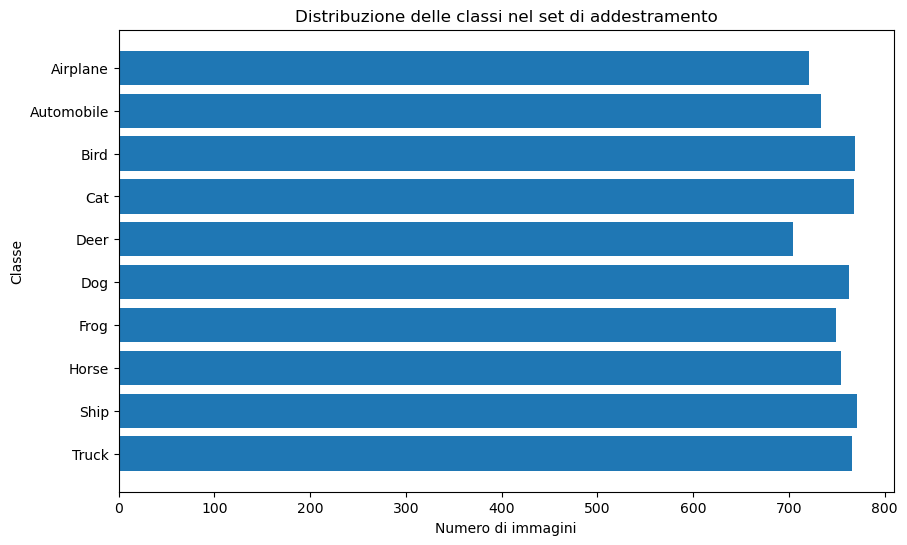

In [27]:
# Definire le nuove classi
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Creare il grafico a barre orizzontale
plt.figure(figsize=(10, 6))
plt.barh(classes_name, counts)
plt.title('Distribuzione delle classi nel set di addestramento')
plt.xlabel('Numero di immagini')
plt.ylabel('Classe')
plt.gca().invert_yaxis()  # Invertire l'asse y per avere la classe con conteggi maggiori in alto
plt.show()

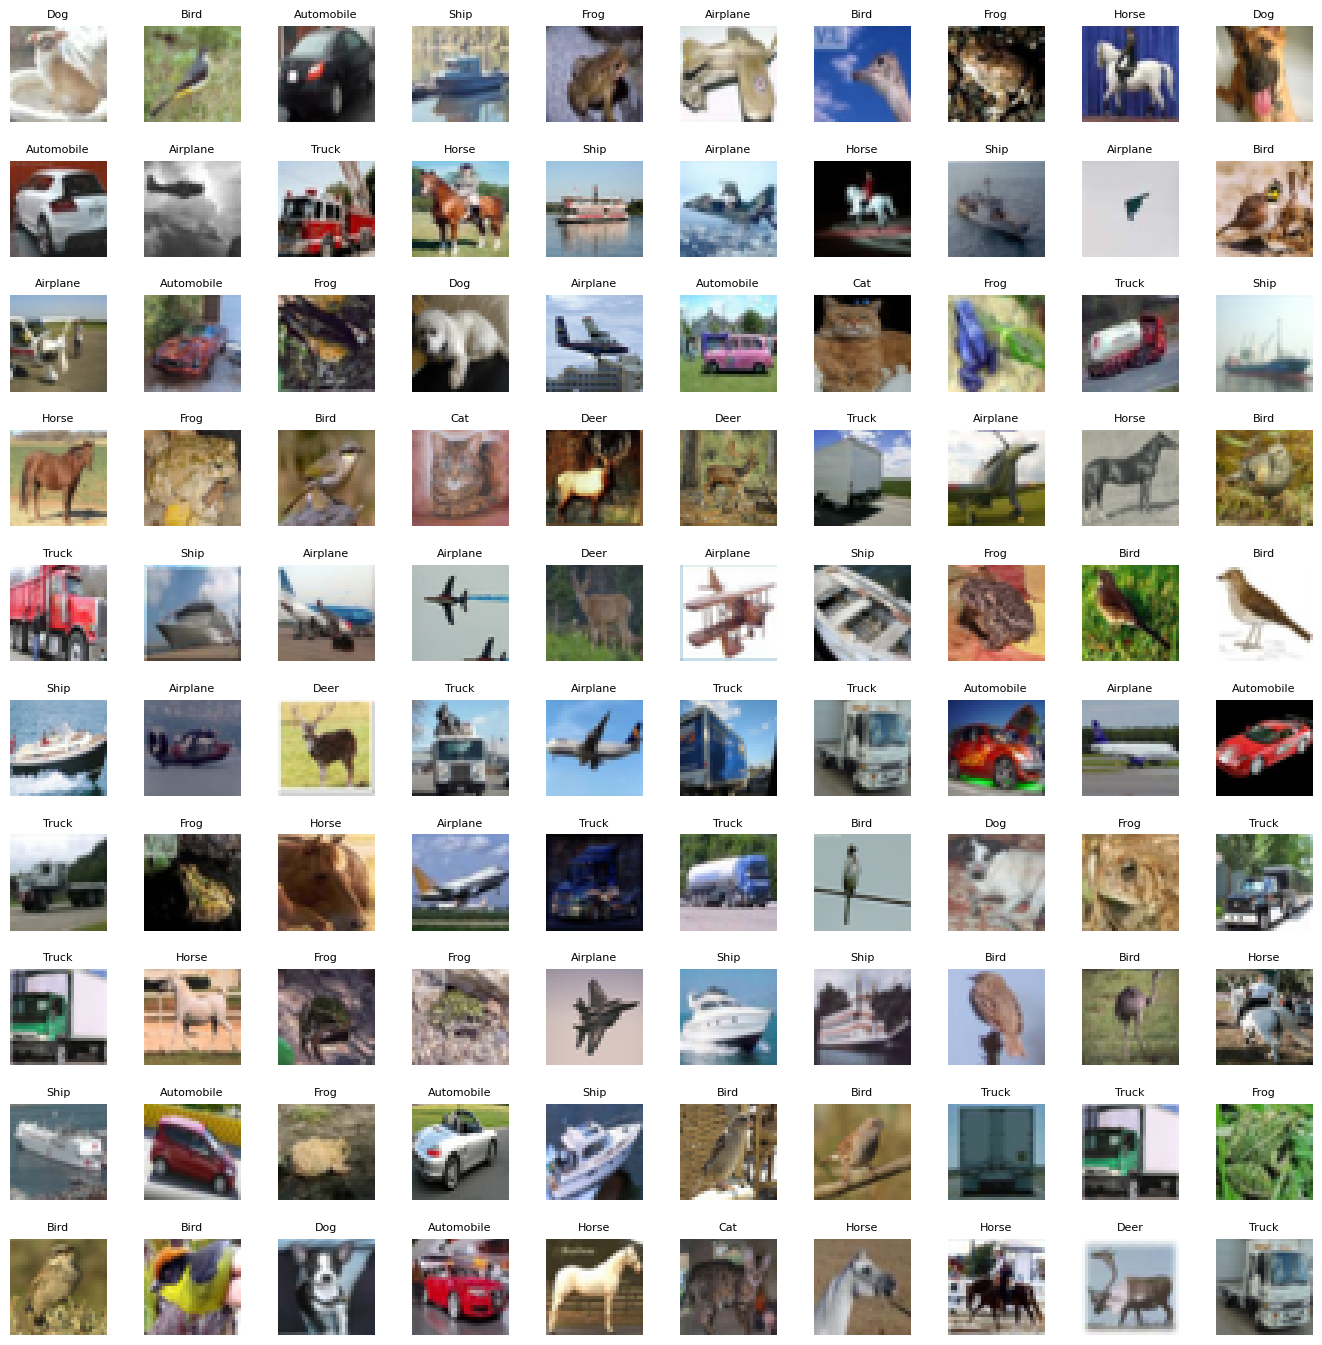

In [28]:
# Definire le dimensioni della griglia
W_grid = 10
L_grid = 10

# Creare una figura e assi
fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))
axes = axes.ravel()  # Appiattire la matrice 10x10 in un array di 100 elementi

n_train = len(val_data)  # Ottenere la lunghezza del dataset di addestramento

# Selezionare e visualizzare le immagini
for i in np.arange(0, W_grid * L_grid):  # Creare variabili spaziate uniformemente
    index = np.random.randint(0, n_train)  # Selezionare un numero casuale
    axes[i].imshow(val_data[index])  # Leggere e visualizzare un'immagine con l'indice selezionato
    axes[i].set_title(labels_mapped3[index], fontsize=8)  # Impostare il titolo usando labels_mapped3
    axes[i].axis('off')  # Nascondere gli assi

# Regolare gli spazi tra i subplots
plt.subplots_adjust(hspace=0.4)
plt.show()

# hot-one-encoding

In [26]:
val_labels.shape

(7500,)

In [27]:
from tensorflow.keras.utils import to_categorical

2024-08-31 14:41:59.533525: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
train_labels = to_categorical(train_labels, 10)
train_labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [29]:
test_labels = to_categorical(test_labels, 10)
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [30]:
val_labels = to_categorical(val_labels, 10)

# DISCARDED MODELS

## MODEL 1

In [31]:
val_data.shape

(7500, 32, 32, 3)

In [32]:
val_labels.shape

(7500, 10)

In [33]:
train_labels.shape

(42500, 10)

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [52]:
model = models.Sequential([
    # Primo blocco di convoluzione e pooling
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Secondo blocco di convoluzione e pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Terzo blocco di convoluzione e pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten dei dati e aggiunta dei livelli completamente connessi
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 neuroni per le 10 classi con attivazione softmax
])

/Users/kingsleygranita/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64,
                    validation_data=(val_data, val_labels))

Epoch 1/20
665/665 ━━━━━━━━━━━━━━━━━━━━ 30s 44ms/step - accuracy: 0.4764 - loss: 1.4484 - val_accuracy: 0.4820 - val_loss: 1.4564
Epoch 2/20
665/665 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step - accuracy: 0.5708 - loss: 1.2173 - val_accuracy: 0.5705 - val_loss: 1.1991
Epoch 3/20
665/665 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.6290 - loss: 1.0662 - val_accuracy: 0.6383 - val_loss: 1.0442
Epoch 4/20
665/665 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - accuracy: 0.6592 - loss: 0.9688 - val_accuracy: 0.6365 - val_loss: 1.0265
Epoch 5/20
665/665 ━━━━━━━━━━━━━━━━━━━━ 38s 57ms/step - accuracy: 0.6816 - loss: 0.9084 - val_accuracy: 0.6549 - val_loss: 0.9808
Epoch 6/20
665/665 ━━━━━━━━━━━━━━━━━━━━ 40s 60ms/step - accuracy: 0.6981 - loss: 0.8564 - val_accuracy: 0.6532 - val_loss: 1.0160
Epoch 7/20
665/665 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.7144 - loss: 0.8222 - val_accuracy: 0.6863 - val_loss: 0.9226
Epoch 8/20
665/665 ━━━━━━━━━━━━━━━━━━━━ 48s 72ms/step - accuracy: 0.7346 - loss: 0.7588 - 

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 3s - 9ms/step - accuracy: 0.6877 - loss: 1.1005
Test accuracy: 0.6876999735832214


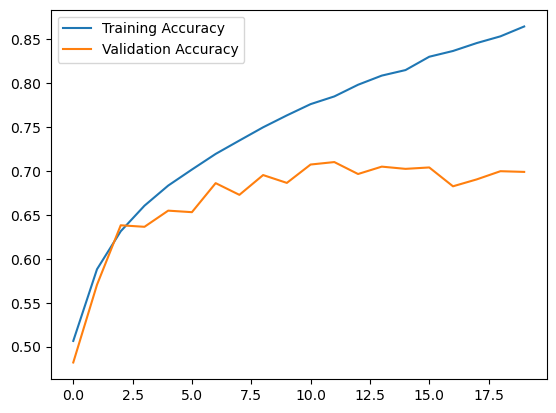

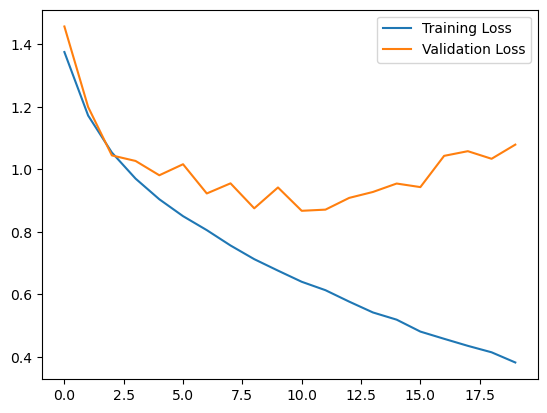

In [40]:
import matplotlib.pyplot as plt

# Plot dell'accuratezza
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot della perdita
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

Sembra che l'accuratezza sul training set (Training Accuracy) stia ancora migliorando, ma l'accuratezza sul validation set (Validation Accuracy) si sia stabilizzata e, in alcune parti, potrebbe indicare che il modello sta iniziando a sovradattarsi ai dati di addestramento.

- una soluzione per prevenire l'overfitting è la data augmentation
- un'altra soluzione potrebbe essere il dropout
- un'altra è l'early stopping
- regolarizzazione

## MODEL 2 (MODEL 1 WITH DATA AUGMENTATION AND DROPOUT)

In [41]:
model = models.Sequential([
    # Data augmentation
    layers.RandomFlip(mode='horizontal', input_shape=(32, 32, 3)),
    
    # Primo blocco di convoluzione e pooling
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Secondo blocco di convoluzione e pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Terzo blocco di convoluzione e pooling
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Flatten dei dati e aggiunta dei livelli completamente connessi
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Aggiunta del dropout con probabilità di 0.5
    layers.Dense(10, activation='softmax')  # 10 neuroni per le 10 classi con attivazione softmax
])

/Users/kingsleygranita/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:

# Compilazione del modello
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [43]:

# Addestramento del modello
history = model.fit(train_images, train_labels, epochs=60, batch_size=64,
                    validation_data=(val_data, val_labels))

Epoch 1/60
665/665 ━━━━━━━━━━━━━━━━━━━━ 51s 73ms/step - accuracy: 0.2386 - loss: 2.0260 - val_accuracy: 0.4353 - val_loss: 1.5419
Epoch 2/60
665/665 ━━━━━━━━━━━━━━━━━━━━ 50s 75ms/step - accuracy: 0.4380 - loss: 1.5312 - val_accuracy: 0.5339 - val_loss: 1.3265
Epoch 3/60
665/665 ━━━━━━━━━━━━━━━━━━━━ 52s 78ms/step - accuracy: 0.5058 - loss: 1.3836 - val_accuracy: 0.5605 - val_loss: 1.2310
Epoch 4/60
665/665 ━━━━━━━━━━━━━━━━━━━━ 47s 70ms/step - accuracy: 0.5475 - loss: 1.2841 - val_accuracy: 0.5833 - val_loss: 1.1577
Epoch 5/60
665/665 ━━━━━━━━━━━━━━━━━━━━ 48s 73ms/step - accuracy: 0.5750 - loss: 1.2023 - val_accuracy: 0.6185 - val_loss: 1.0587
Epoch 6/60
665/665 ━━━━━━━━━━━━━━━━━━━━ 43s 64ms/step - accuracy: 0.5991 - loss: 1.1459 - val_accuracy: 0.6332 - val_loss: 1.0353
Epoch 7/60
665/665 ━━━━━━━━━━━━━━━━━━━━ 39s 59ms/step - accuracy: 0.6162 - loss: 1.1043 - val_accuracy: 0.6336 - val_loss: 1.0038
Epoch 8/60
665/665 ━━━━━━━━━━━━━━━━━━━━ 45s 68ms/step - accuracy: 0.6329 - loss: 1.0439 - 

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 3s - 10ms/step - accuracy: 0.7556 - loss: 0.8183
Test accuracy: 0.7555999755859375


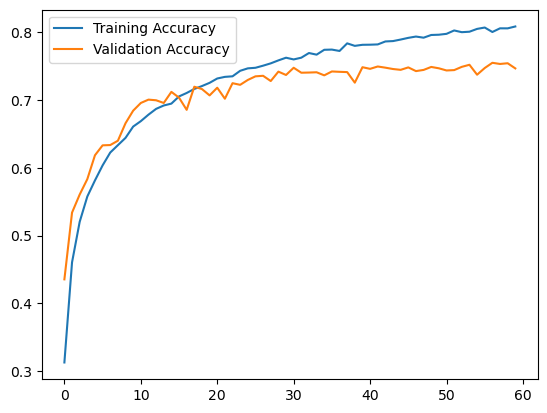

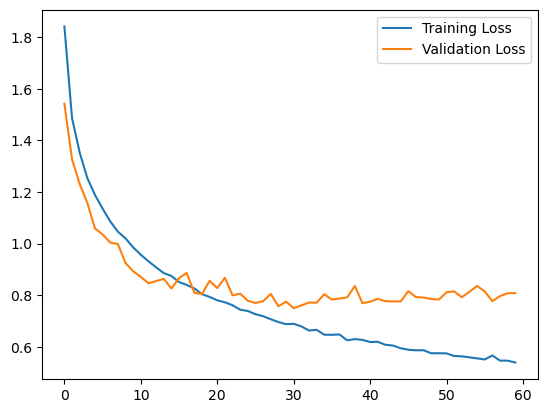

In [45]:
import matplotlib.pyplot as plt

# Plot dell'accuratezza
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot della perdita
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

In [46]:
# Inference
yc_pred = model.predict(test_images)
y_pred = np.argmax(yc_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


In [47]:
y_test_classes = np.argmax(test_labels, axis=1)

In [48]:
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [49]:
y_test_classes

array([3, 8, 8, ..., 5, 1, 7])

In [50]:
from sklearn.metrics import classification_report
# Classification report
print('Classification report:')
print(classification_report(y_test_classes, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76      1000
           1       0.90      0.85      0.87      1000
           2       0.64      0.68      0.66      1000
           3       0.61      0.56      0.58      1000
           4       0.66      0.77      0.71      1000
           5       0.75      0.59      0.66      1000
           6       0.81      0.84      0.82      1000
           7       0.80      0.78      0.79      1000
           8       0.90      0.78      0.84      1000
           9       0.83      0.86      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [88]:
model.save('modello2.h5')


## MODEL  (DISCARDED)

In [57]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [61]:


# Creazione del modello
model2 = models.Sequential([
    # Data augmentation
    layers.RandomFlip("horizontal", input_shape=(32, 32, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1),
    
    # Primo blocco di convoluzione e pooling
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    
    # Secondo blocco di convoluzione e pooling
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    
    # Terzo blocco di convoluzione
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    
    # Flatten dei dati e aggiunta dei livelli completamente connessi
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),  # Dropout per ridurre l'overfitting
    layers.Dense(10, activation='softmax')  # 10 neuroni per le 10 classi con attivazione softmax
])

In [94]:
# Compilazione del modello
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback: Early Stopping e ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Addestramento del modello
history = model2.fit(train_images, train_labels, 
                    epochs=100, 
                    validation_data=(val_data, val_labels), 
                    batch_size=64,  
                    callbacks=[early_stopping, reduce_lr])


Epoch 1/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 73s 104ms/step - accuracy: 0.2188 - loss: 2.1556 - val_accuracy: 0.4087 - val_loss: 1.6705 - learning_rate: 0.0010
Epoch 2/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 73s 109ms/step - accuracy: 0.3701 - loss: 1.7953 - val_accuracy: 0.4772 - val_loss: 1.5293 - learning_rate: 0.0010
Epoch 3/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 66s 100ms/step - accuracy: 0.4074 - loss: 1.7183 - val_accuracy: 0.4832 - val_loss: 1.4779 - learning_rate: 0.0010
Epoch 4/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 88s 133ms/step - accuracy: 0.4320 - loss: 1.6670 - val_accuracy: 0.4919 - val_loss: 1.4779 - learning_rate: 0.0010
Epoch 5/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 69s 104ms/step - accuracy: 0.4483 - loss: 1.6299 - val_accuracy: 0.5205 - val_loss: 1.4293 - learning_rate: 0.0010
Epoch 6/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 72s 108ms/step - accuracy: 0.4662 - loss: 1.6060 - val_accuracy: 0.4800 - val_loss: 1.6128 - learning_rate: 0.0010
Epoch 7/100
665/665 ━━━━━━━━━━━━━━━━━━━━ 69s 104ms/step - accura

In [62]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_3 (RandomFlip)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_2               │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_2 (RandomZoom)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_2               │ (None, 32, 32, 3)      │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

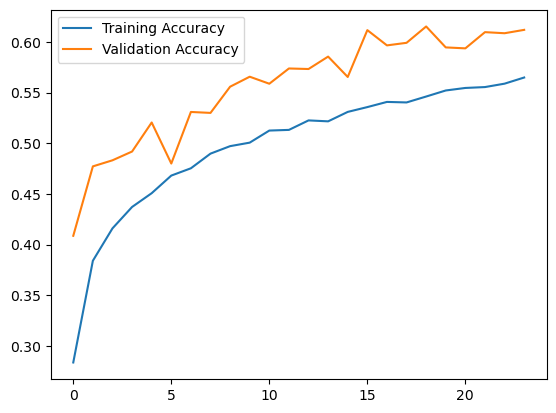

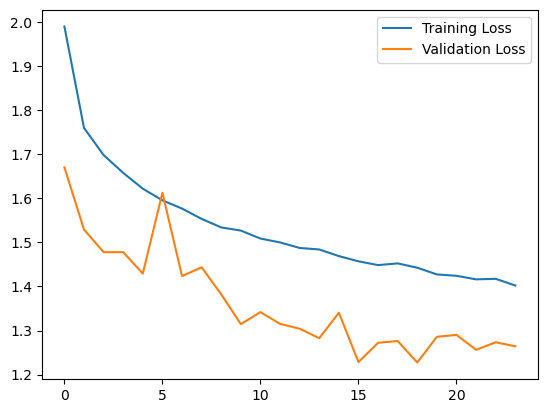

In [97]:
import matplotlib.pyplot as plt

# Plot dell'accuratezza
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot della perdita
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [99]:
# Salvataggio del modello
model.save('cifar2_model.h5')

the model underfitted and i've decided to discard it

## MODEL 3

In [ ]:
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [110]:


# Creazione del modello
model2 = models.Sequential([
    # Data augmentation
    layers.RandomFlip("horizontal", input_shape=(32, 32, 3)),
    
    # Primo blocco di convoluzione e pooling
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    
    # Secondo blocco di convoluzione e pooling
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    
    # Terzo blocco di convoluzione e pooling
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    
    # Quarto blocco di convoluzione (aggiunto per maggiore complessità)
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    
    # Flatten dei dati e aggiunta dei livelli completamente connessi
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')  # 10 neuroni per le 10 classi con attivazione softmax
])



In [111]:
model2.summary()

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_15 (RandomFlip)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_59 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,218 (5.70 MB)

 Trainable params: 1,494,218 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Compilazione del modello
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback: Early Stopping e ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)


In [ ]:
# Addestramento del modello
history = model2.fit(train_images, train_labels, 
                    epochs=100, 
                    validation_data=(val_data, val_labels), 
                    batch_size=64,  
                    callbacks=[early_stopping, reduce_lr])


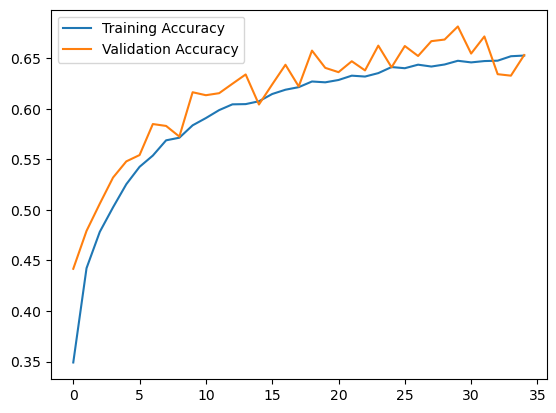

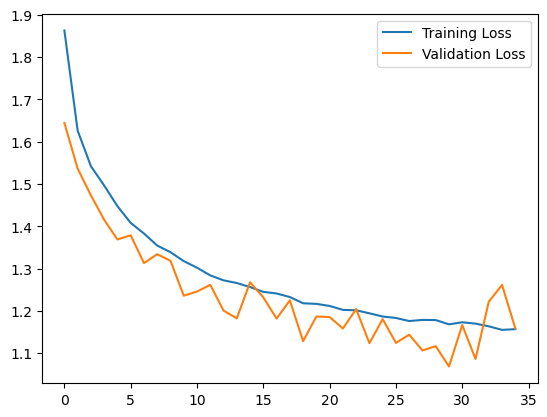

In [104]:
import matplotlib.pyplot as plt

# Plot dell'accuratezza
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot della perdita
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

## FINAL MODEL BETA (DISCARDED)

In [120]:
model2 = models.Sequential([
    # Data augmentation
    layers.RandomFlip("horizontal", input_shape=(32, 32, 3)),
    
    # Primo blocco di convoluzione e pooling
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Secondo blocco di convoluzione e pooling
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Terzo blocco di convoluzione e pooling
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    # Quarto blocco di convoluzione e pooling (raddoppiando i filtri)
    layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    #aggiungo un dropout
    layers.Dropout(0.5),

    # Flatten dei dati e aggiunta dei livelli completamente connessi
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')  # 10 neuroni per le 10 classi con attivazione softmax
])

In [123]:

# Compilazione del modello
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback: Early Stopping e ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [124]:
# Addestramento del modello
history = model2.fit(train_images, train_labels, 
                    epochs=50, 
                    validation_data=(val_data, val_labels), 
                    batch_size=64,  
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 211s 311ms/step - accuracy: 0.5423 - loss: 2.0642 - val_accuracy: 0.6224 - val_loss: 1.6715 - learning_rate: 0.0010
Epoch 2/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 199s 299ms/step - accuracy: 0.6748 - loss: 1.5779 - val_accuracy: 0.6575 - val_loss: 1.6107 - learning_rate: 0.0010
Epoch 3/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 198s 298ms/step - accuracy: 0.7171 - loss: 1.4539 - val_accuracy: 0.6240 - val_loss: 1.7001 - learning_rate: 0.0010
Epoch 4/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 210s 316ms/step - accuracy: 0.7381 - loss: 1.4357 - val_accuracy: 0.7005 - val_loss: 1.4901 - learning_rate: 0.0010
Epoch 5/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 196s 294ms/step - accuracy: 0.7580 - loss: 1.3695 - val_accuracy: 0.7117 - val_loss: 1.4809 - learning_rate: 0.0010
Epoch 6/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 199s 299ms/step - accuracy: 0.7758 - loss: 1.2909 - val_accuracy: 0.7115 - val_loss: 1.4791 - learning_rate: 0.0010
Epoch 7/50
665/665 ━━━━━━━━━━━━━━━━━━━━ 199s 299ms/step - accura

In [160]:
test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 7s - 23ms/step - accuracy: 0.8514 - loss: 0.8395
Test accuracy: 0.8514000177383423


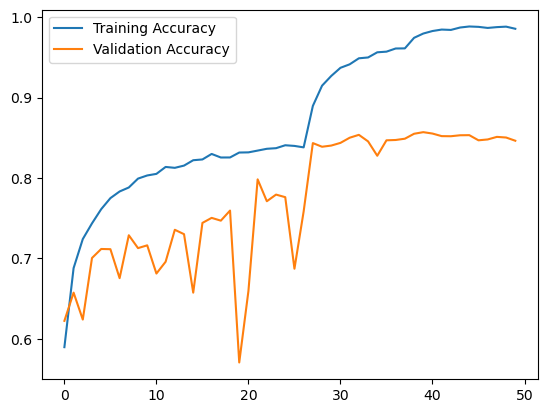

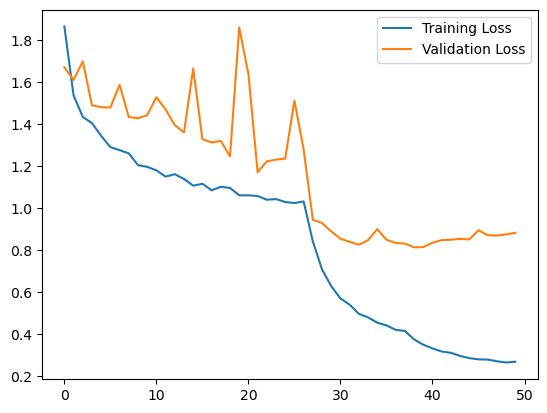

In [126]:
import matplotlib.pyplot as plt

# Plot dell'accuratezza
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot della perdita
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [129]:
# Inference
yc_pred = model2.predict(test_images)
y_pred = np.argmax(yc_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


In [130]:
y_test_classes = np.argmax(test_labels, axis=1)

In [131]:
test_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [132]:
from sklearn.metrics import classification_report
# Classification report
print('Classification report:')
print(classification_report(y_test_classes, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.66      0.47      0.55      1000
           1       0.33      0.94      0.49      1000
           2       0.72      0.25      0.37      1000
           3       0.34      0.47      0.40      1000
           4       0.96      0.02      0.05      1000
           5       0.51      0.42      0.46      1000
           6       0.92      0.17      0.28      1000
           7       0.58      0.58      0.58      1000
           8       0.54      0.56      0.55      1000
           9       0.39      0.67      0.49      1000

    accuracy                           0.45     10000
   macro avg       0.60      0.45      0.42     10000
weighted avg       0.60      0.45      0.42     10000



In [135]:
# Save the entire model in the recommended Keras format
model2.save('Final_model_discarded.keras')



The model trained for too many epochs and also overfitted

# FINAL MODEL 

To prevent overfitting i'm going to add dropouts to every block

In [63]:
model3 = models.Sequential([
    # Data augmentation
    layers.RandomFlip("horizontal", input_shape=(32, 32, 3)),
    
    # Primo blocco di convoluzione e pooling
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    # Secondo blocco di convoluzione e pooling
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),   
    # Terzo blocco di convoluzione e pooling
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    # Quarto blocco di convoluzione e pooling (raddoppiando i filtri)
    layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    #aggiungo un dropout
    layers.Dropout(0.5),

    # Flatten dei dati e aggiunta dei livelli completamente connessi
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(10, activation='softmax')  # 10 neuroni per le 10 classi con attivazione softmax
])

In [64]:
model3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_4 (RandomFlip)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,825,994 (6.97 MB)

 Trainable params: 1,824,074 (6.96 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [171]:

# Compilazione del modello
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback: Early Stopping e ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [172]:
# Addestramento del modello
history = model3.fit(train_images, train_labels, 
                    epochs=40, 
                    validation_data=(val_data, val_labels), 
                    batch_size=64,  
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/40
665/665 ━━━━━━━━━━━━━━━━━━━━ 293s 434ms/step - accuracy: 0.3745 - loss: 2.7037 - val_accuracy: 0.3040 - val_loss: 3.0888 - learning_rate: 0.0010
Epoch 2/40
665/665 ━━━━━━━━━━━━━━━━━━━━ 274s 412ms/step - accuracy: 0.5942 - loss: 1.8344 - val_accuracy: 0.6285 - val_loss: 1.7019 - learning_rate: 0.0010
Epoch 3/40
665/665 ━━━━━━━━━━━━━━━━━━━━ 275s 413ms/step - accuracy: 0.6668 - loss: 1.5939 - val_accuracy: 0.6320 - val_loss: 1.7170 - learning_rate: 0.0010
Epoch 4/40
665/665 ━━━━━━━━━━━━━━━━━━━━ 273s 411ms/step - accuracy: 0.6936 - loss: 1.5383 - val_accuracy: 0.6840 - val_loss: 1.5670 - learning_rate: 0.0010
Epoch 5/40
665/665 ━━━━━━━━━━━━━━━━━━━━ 275s 414ms/step - accuracy: 0.7133 - loss: 1.5199 - val_accuracy: 0.6672 - val_loss: 1.6423 - learning_rate: 0.0010
Epoch 6/40
665/665 ━━━━━━━━━━━━━━━━━━━━ 274s 412ms/step - accuracy: 0.7197 - loss: 1.5239 - val_accuracy: 0.6349 - val_loss: 1.8196 - learning_rate: 0.0010
Epoch 7/40
665/665 ━━━━━━━━━━━━━━━━━━━━ 276s 415ms/step - accura

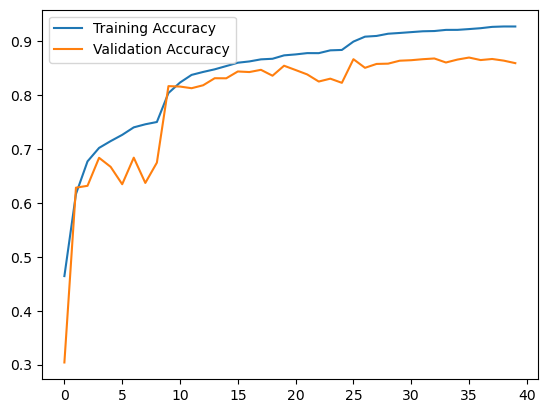

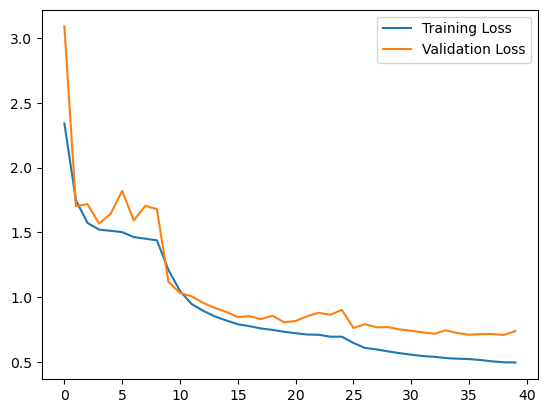

In [173]:
import matplotlib.pyplot as plt

# Plot dell'accuratezza
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Plot della perdita
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [174]:
test_loss, test_acc = model3.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 14s - 44ms/step - accuracy: 0.8638 - loss: 0.7141
Test accuracy: 0.8637999892234802


In [175]:
# Salva il modello completo in formato .keras 
model3.save('FINAL_MODEL.keras')

In [177]:
# Inference
yc_pred = model3.predict(test_images)
y_pred = np.argmax(yc_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step


In [178]:
y_test_classes = np.argmax(test_labels, axis=1)

In [179]:
from sklearn.metrics import classification_report
# Classification report
print('Classification report:')
print(classification_report(y_test_classes, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.94      0.91      0.93      1000
           2       0.85      0.81      0.83      1000
           3       0.79      0.69      0.74      1000
           4       0.83      0.87      0.85      1000
           5       0.83      0.79      0.81      1000
           6       0.84      0.94      0.88      1000
           7       0.90      0.90      0.90      1000
           8       0.86      0.94      0.90      1000
           9       0.92      0.90      0.91      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

